In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import MetricFunctions

In [2]:
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8').astype(int)
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [3]:
knn_classifier = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}


grid_search = GridSearchCV(
    knn_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [4]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [5]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

Best Parameters:  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy:  0.9633651703930692


In [6]:
MetricFunctions.printAccuracy(best_model, X_train, X_test, y_train, y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, y_train, y_test)

Test accuracy: 96.07%
Train accuracy: 99.06%
Test Log Loss: 0.2957817343690011
Train Log Loss: 0.017436948044464804


In [7]:
MetricFunctions.printAUCandPvalues(y_test, y_score)

AUC-ROC: 0.9894447315341146
P-value: 0.021110536931770785


In [8]:
MetricFunctions.printAUCPRandF1Scores(y_test, y_pred, y_score)

AUC-PR: 0.9921370667468957
F1 Score: 0.9656533754441373


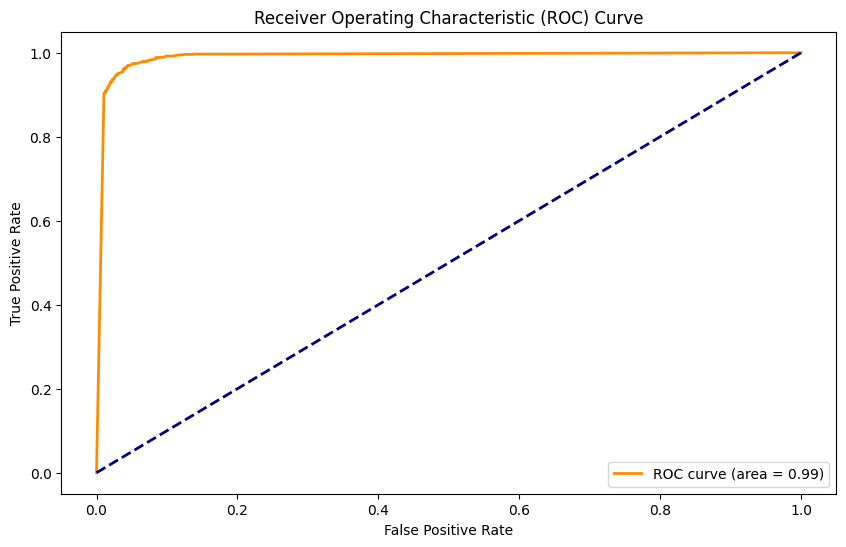

In [9]:
MetricFunctions.plotROCCurve(y_test, y_score)

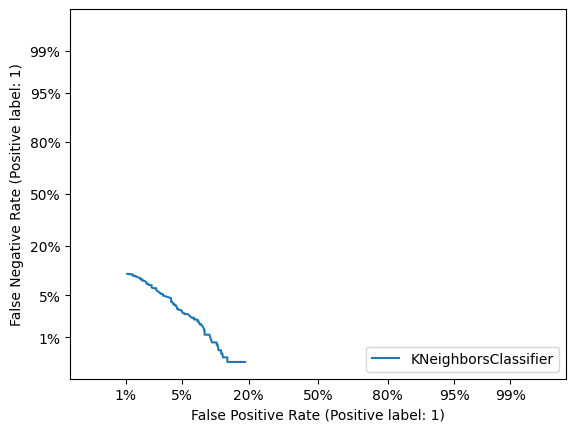

In [10]:
MetricFunctions.plotDetCurve(best_model, X_test, y_test)

Confusion Matrix:
[[ 901   55]
 [  32 1223]]


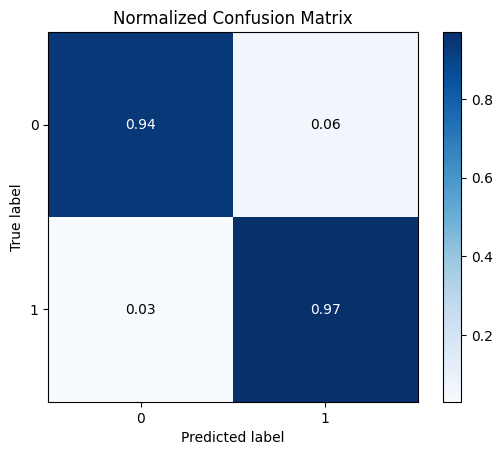

In [11]:
MetricFunctions.printConfMatrix(y_test, y_pred)
MetricFunctions.plotConfMatrix(y_test, y_pred)

C:\Users\Vilius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


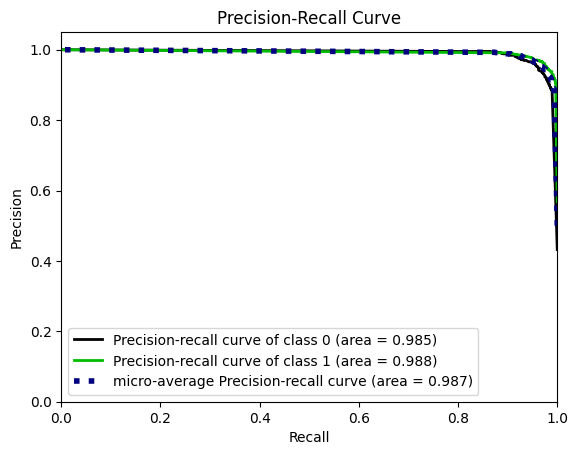

In [12]:
MetricFunctions.plotPrecisionRecallCurve(y_test, y_prob)

In [13]:
import joblib
joblib.dump(best_model, 'models/knn_model.pkl')

['models/knn_model.pkl']